In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import gc
import os
import re
import sklearn
import sys

from joblib import Parallel, delayed
from tqdm import *

%matplotlib inline
%load_ext autoreload
%autoreload 1

In [2]:
src_dir = os.path.join(os.getcwd(), os.pardir, '../src')
sys.path.append(src_dir)

In [3]:
%aimport data.movielens_20m_imdb

from data.movielens_20m_imdb import load_or_get_from_cache

In [5]:
INTERIM_DATA_ROOT = os.path.abspath("../../data/interim/movielens-ml20m-imdb/")
ML_ROOT = "/media/felipe/SAMSUNG/movielens/ml-20m/"
IMDB_ROOT = "/media/felipe/SAMSUNG/imdb/"

PATH_TO_MOVIES = ML_ROOT + "/movies.csv"
PATH_TO_TAG_ASSIGNMENTS = ML_ROOT + "/tags.csv"
# slightly modified version, without the top 15 lines
PATH_TO_MOVIE_PLOTS = IMDB_ROOT+"/plot.list.tail"

In [8]:
docs_df = load_or_get_from_cache(PATH_TO_MOVIES,PATH_TO_TAG_ASSIGNMENTS,PATH_TO_MOVIE_PLOTS,INTERIM_DATA_ROOT)

In [9]:
docs_df.head(10)

,movie_id,title,tags,plot
0,1,Toy Story (1995),"family,light,fun,want-to-see-again,classic,kid...",A little boy named Andy loves to be in his ro...
1,2,Jumanji (1995),"jungle,chris-van-allsburg,time,dynamic-cgi-act...",After being trapped in a jungle board game fo...
2,3,Grumpier Old Men (1995),"howard-deutch,sequel,sequel-fever,comedinha-de...",Things don't seem to change much in Wabasha C...
3,4,Waiting to Exhale (1995),"characters,chick-flick,clv,revenge",This story based on the best selling novel by...
4,5,Father of the Bride Part II (1995),"family,childhood-classics,it-thought-it-was-fu...","In this sequel to ""Father of the Bride"", Geor..."
5,6,Heat (1995),"somber,btaege,violent,erlends-dvds,cant-rememb...",Hunters and their prey--Neil and his professi...
6,7,Sabrina (1995),"harrison-ford,relationships,ugly-duckling,dram...","While she was growing up, Sabrina Fairchild s..."
7,8,Tom and Huck (1995),"library-system,authormark-twain,based-on-a-boo...","A mischievous young boy, Tom Sawyer ('Jonatha..."
8,9,Sudden Death (1995),"clv,peter-hyams,action,jeanclaude-van-damme,ca...",Some terrorists kidnap the Vice President of ...
9,10,GoldenEye (1995),"007-series,bond,seen-more-than-once,btaege,fra...",When a deadly satellite weapon system falls i...


In [10]:
docs_df.describe()

,movie_id
count,8470.000000
mean,41131.287957
std,41030.226619
min,1.000000
25%,4275.250000
50%,26534.000000
75%,78996.250000
max,131054.000000


In [11]:
docs_df.describe(include=['object'])

,title,tags,plot
count,8470,8470,8470
unique,8470,7632,8469
top,Yossi & Jagger (2002),bdr,Where the Red Fern Grows is the heartwarming ...
freq,1,190,2


In [12]:
docs_df['num_tags'] = docs_df['tags'].map(lambda tags: len(tags.split(',')) )
docs_df[['title','num_tags']].head(10)

,title,num_tags
0,Toy Story (1995),80
1,Jumanji (1995),33
2,Grumpier Old Men (1995),15
3,Waiting to Exhale (1995),4
4,Father of the Bride Part II (1995),16
5,Heat (1995),82
6,Sabrina (1995),20
7,Tom and Huck (1995),7
8,Sudden Death (1995),5
9,GoldenEye (1995),43


(1, 100)

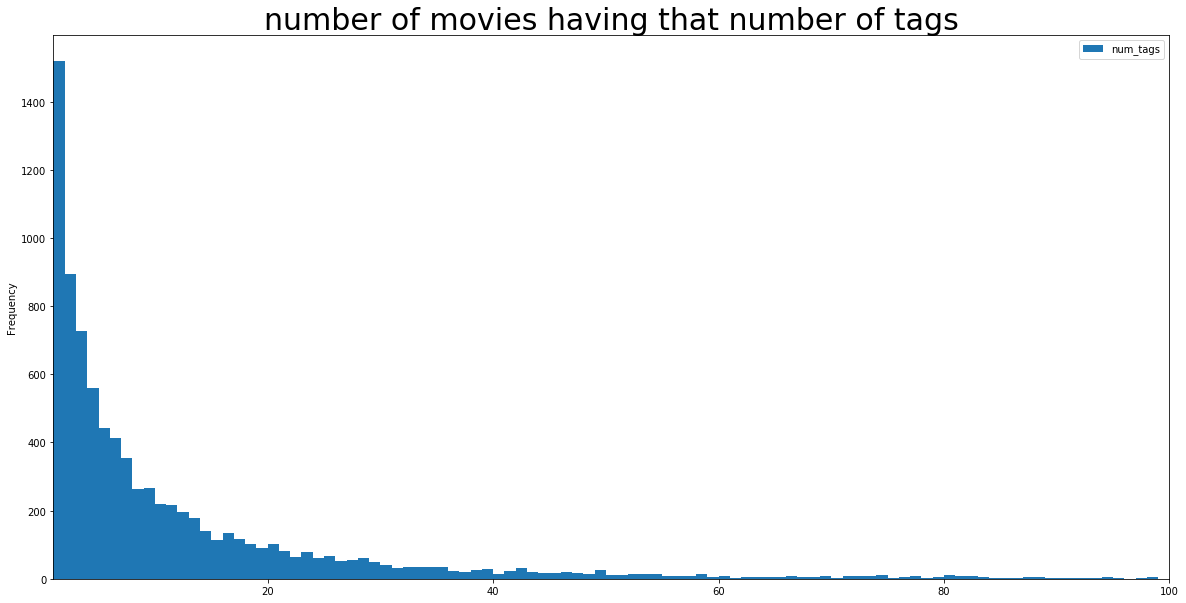

In [13]:
docs_df[['num_tags']].plot(kind='hist',bins=np.arange(1.0,100,1))

plt.gcf().set_size_inches(20,10)
plt.gca().set_title('number of movies having that number of different tags',fontsize=30)
plt.gca().set_xlim(1,100)

## number of unique tags

In [14]:
tagsets = [tagset.split(',') for tagset in docs_df["tags"].values]

flat_list = []

for tagset in tagsets:
    for tag in tagset:
        flat_list.append(tag)
        
flat_set = set(flat_list)

In [15]:
len(flat_set)

22653